#### Understanding Multiclass Classification

For instance, given data on customer
transactions, the marketing team may be tasked with
identifying the credit card product most suitable for a
customer, such as cashback, air miles, gas station, or
shopping.

Multiclass classification can be broadly divided into the
following three categories:

1. Multiclass classification: Multiclass classification problems involve classifying instances or samples into one class out of multiple classes (more than two). Each sample is assigned only one label and cannot be assigned more than one label at a time. For example, an image can be classified as that of a cat, dog, or rabbit, and not more than one of them at the same time.
2. Multilabel classification: In the case of multilabel classification, each sample is assigned a set of target labels. For example, given some news articles, we may want to assign multiple labels to each of these articles to know what kind of topics they cover.
3. Multioutput Regression: In the case of multioutput regression, each sample is assigned several target variables with different properties. For instance, the target could be to predict the wind direction, humidity, and temperature.

#### Classifiers in multiclass classification

Multiclass classification can be implemented by scikit-learn in the following two ways:

1. One-vs-all classifier: Here, one classifier is fitted against one class. For each of the classifiers, the class is then fitted against all the other classes, producing a real-valued decision confidence score, instead of class labels. From the decision confidence score, the maximum value is picked up to get the final class label. The advantage of one-vs-all is its interpretability and efficiency. The following figure illustrates how this classifier works:

Illustration of the workings of a one-vs-all classifier

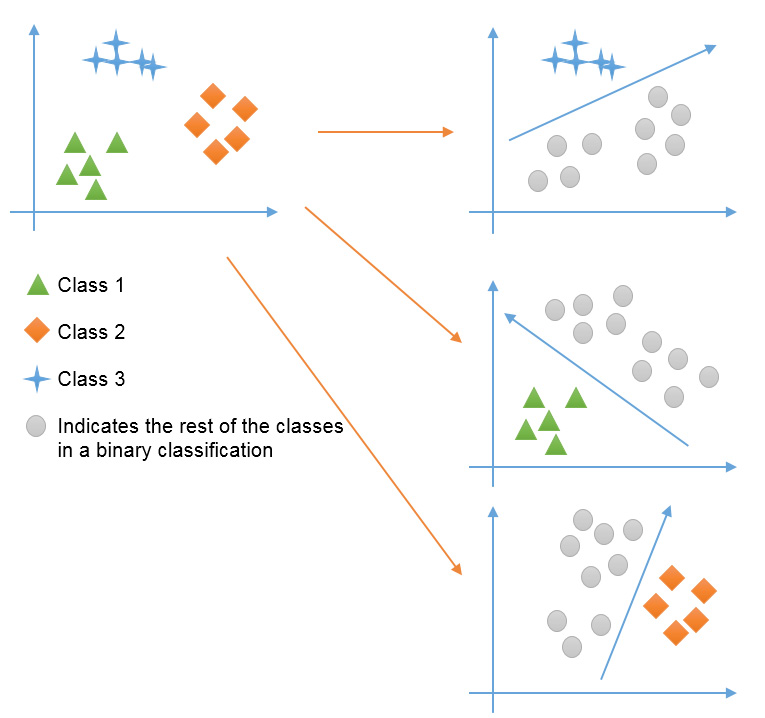

2. One-vs-one classifier: This constructs one classifier per pair of classes. The intuitive idea is to develop a binary classifier for each possible pair of classes, derive the decision boundary between these two classes, and build an ensemble. During prediction, the label is assigned by majority voting and in the event of a tie, the class with the highest aggregate classification confidence (obtained by summing the pairwise confidence levels that were calculated earlier) is selected.

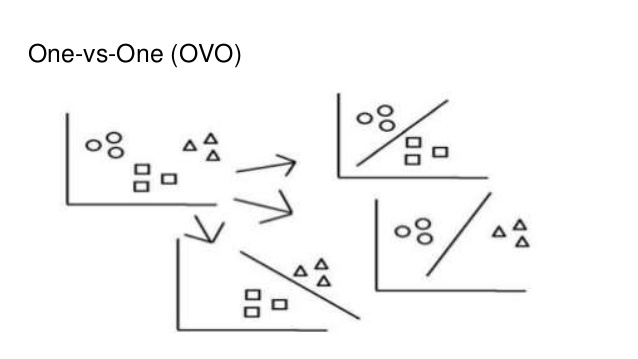


The dataset comprises data on the quantities of 13
constituents of three different wine cultivars grown in the
same region of Italy. Given the chemical composition, you
need to classify which variety of wine each sample belongs to.
The target variable for the wines consists of three classes,
causing this to become a multiclass classification problem.
You need to implement a multiclass classification algorithm to
classify these three different varieties of wine and observe the
difference between OneVsRestClassifier and OneVsOneClassifier:

In [1]:
from sklearn.datasets import load_wine
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import LinearSVC

Note

Linear SVC is similar to SVC with the
kernel='linear' parameter but is implemented as
liblinear rather than libsvm, so it has more
flexibility in the choice of penalties and loss functions and
should scale better to large numbers of samples.

Use wine.data and wine.target to load all the features
and the target to variables X and y, respectively:

In [2]:
wine = load_wine()
X, y = wine.data, wine.target

In [3]:
#### Fit and predict using the onevsall classifier
#### Output of the one-vs-all classifier

OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

C:\Users\salam\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\salam\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\salam\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2])

In [4]:
#### Output of the one-vs-one classifier

OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)

C:\Users\salam\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\salam\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\salam\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2,
       2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

From the preceding outputs, you will observe that both the
classifiers give the same results. The difference between both,
however, is the computation time. The onevsone
classifier fits k * (k-1)
/ 2 classifiers, resulting in a greater number of
pairs, which leads to an increase in computation time.

#### Performance Metrics

The performance metrics in the case of multiclass classification would be the same as what we preivously used for binary classification, that is, precision, recall, and F1score obtained using a confusion matrix.

In the case of a multiclass classification problem, we average out the metrics to find out the __micro-average or macro-average__ of the precision, recall, and F1 score in a k-class system, where k is the number of classes. Averaging is useful in the case of multiclass classification since we have multiple
class labels:

Micro-average:

This weighs each instance or prediction equally. It aggregates the  contributions of all classes to  compute the average metric. If our dataset is not balanced and we want our classifiers to be biased toward the least
frequent classes, then we use the micro-average.

The micro-average for precision, recall, and F1 metrics is calculated by summing up the individual true positives (TPs), false positives (FPs), and false negatives (FNs) as follows:

Equation for calculating the micro-average of various performance metrics

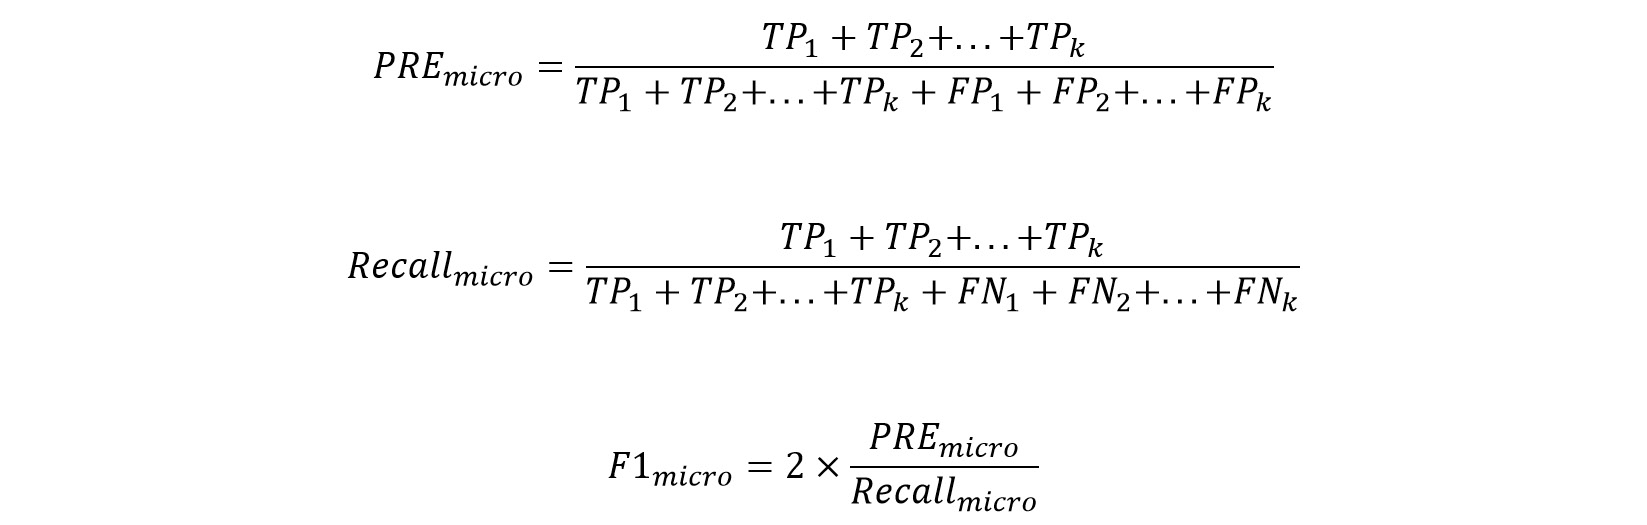

Macro-average:

In the case of macro-averaging, all classes are equally weighted to evaluate the overall performance of a classifier with respect to the most frequent class labels. It computes the metric independently for each class and then takes the average (hence, treating all classes equally). If our dataset is not
balanced and we want our classifiers to be biased toward the most frequent classes, then we use macro-average. The macro-average for the various performance metrics can be calculated as follows:

Equation for calculating the macro-average of various performance metrics

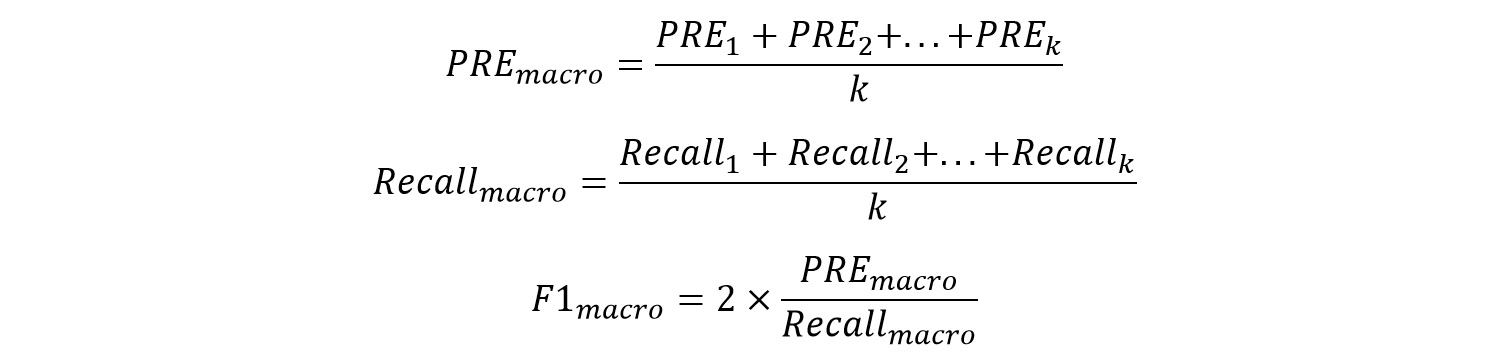

#### Evaluating performance using multiclass performance metrics

We will evaluate the performance of our
model using different metrics and observe the difference
between the performance metrics:

In [5]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
type(load_wine())

sklearn.utils.Bunch

In [7]:
dir(load_wine())

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [8]:
wine_data = load_wine()

In [9]:
data = pd.DataFrame(data=np.c_[wine_data['data'], wine_data['target']],
                     columns=wine_data['feature_names'] + ['target'])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [10]:
#### Features of the wine_data

wine_data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [11]:
#### Target names of wine_data

wine_data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [12]:
pd.DataFrame(wine_data['target_names'])[0].value_counts()

class_1    1
class_0    1
class_2    1
Name: 0, dtype: int64

In [13]:
wine_data['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(wine_data['data'], wine_data['target'], test_size=0.20, random_state=123, 
                                                    stratify=wine_data['target'])

In [15]:
model = svm.SVC(kernel='linear')
clf = model.fit(X_train, y_train)

In [16]:
y_pred = clf.predict(X_test)

Fit the macro-averaging and the micro-averaging using the precision_recall_fscore_support function.

The precision_recall_fscore_support function can directly calculate the metrics for micro- and macro-averages, as follows:

In [17]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.9743589743589745, 0.9761904761904763, 0.9743209876543211, None)

In [18]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.9722222222222222, 0.9722222222222222, 0.9722222222222222, None)

You will get approximately the following values as output
for macro- and micro-averages respectively: 0.974, 0.976, 0.974, None and 0.972, 0.972, 0.972, None.
These values represent the precision, recall, F1 score, and support metrics, respectively.

You can also calculate more detailed metrics statistics
using the classification_report function. Store the
target names of the wine data in the target_names
variable. Generate the classification report using the
y_test and y_pred variables:

In [19]:
#### Output of the classification_report function

target_names = wine_data['target_names']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.93      0.96        14
     class_2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



From the preceding classification report, we can see that when
using micro-averaging, since each of the classes are equally
weighted, we get similar scores for precision, recall, and f1,
whereas macro-averaging gives weightage to the most frequent class labels, resulting in different scores.

#### Class Imbalanced Data

Class imbalance is the most common problem that a data
scientist can encounter. Most real-world classification tasks involve classifying data, where one class or multiple classes are overrepresented.
This is called class imbalance.
Common examples where class imbalanced data is encountered is in fraud detection, antimoney laundering, spam detection, and cancer detection.

#### Performing classification inbalanced data

For this exercise, we are going to use the mammography dataset from UCI. The dataset contains some attributes of patients, using which we need to build a model that can predict whether a patient will have cancer (that is, a
malignant outcome, indicated by 1) or not (that is, a benign outcome, indicated by −1). 70% of the dataset has benign outcomes; hence, it is a highly imbalanced dataset. In this exercise, we will observe how imbalanced data affects the performance of a model:

In [20]:
from imblearn.datasets import fetch_datasets
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [21]:
mammography = fetch_datasets()['mammography']

In [22]:
pd.DataFrame(mammography['target'])[0].value_counts()

-1    10923
 1      260
Name: 0, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(mammography['data'],
                                                   mammography['target'],
                                                   test_size=0.20,
                                                   random_state=123,
                                                   stratify=mammography['target'])

In [24]:
pd.DataFrame(y_train)[0].value_counts()

-1    8738
 1     208
Name: 0, dtype: int64

In [25]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
                                   min_samples_split=7, random_state=0)
clf_random.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [26]:
y_pred = clf_random.predict(X_test)

In [27]:
#### Output of the classification_report function

target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99      2185
   Malignant       0.81      0.48      0.60        52

    accuracy                           0.99      2237
   macro avg       0.90      0.74      0.80      2237
weighted avg       0.98      0.99      0.98      2237



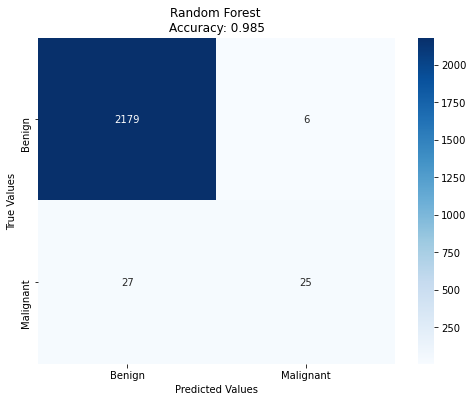

In [28]:
cm = confusion_matrix(y_test, y_pred)
cmd_df = pd.DataFrame(cm,
                     index=['Benign', 'Malignant'],
                     columns=['Benign', 'Malignant'])

plt.figure(figsize=(8, 6))
sns.heatmap(cmd_df, annot=True, fmt='g', cmap='Blues')
plt.title('Random Forest \nAccuracy: {0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

From the preceding confusion matrix, we can say that our model classified 27 cases out of 52 cases as __Benign__; however, they were actually Malignant. Similarly, the model classified 6 cases as __Malignant__, when the cases were actually __Benign__.

It's therefore clear that class imbalance influenced the
machine learning model to be more biased toward the
majority class, which is Benign. This is because the machine
learning algorithm learns by implicitly optimizing predictions
depending on the most abundant class in the dataset to
minimize the cost function during training. As a result, the
classifier failed to correctly predict the malignant cases, which
can be very dangerous in cancer detection, although the
accuracy of the model is 98%. If we see the recall score for
malignant cases, then it's less than 50%.

#### Dealing with class-imbalanced data

One way of dealing with the imbalanced dataset is to assign a
penalty to every wrong prediction on the minority class. This
can be done using the __class_weight__ parameter available in
scikitlearn.

Therefore, the code in step 6 of the preceding exercise can be
changed as shown here:

clf_random =
RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=7,
random_state=0, class_weight='balanced')

There are other strategies to deal with imbalanced data as
well. Some of them are as follows:

__Random Undersampling__: In the case of random undersampling, the majority class samples are randomly eliminated to maintain class balance. The advantage of using this method is that it reduces the number of training samples, and hence the training time decreases; however, it may lead to underfitted models.

__Random Oversampling__: In the case of random oversampling, the minority class samples are replicated randomly to represent a higher representation of the minority class in the training sample. The advantage of using this method is that there is no information loss; however, it may lead to overfitting of the data.

__Synthetic Minority Oversampling Technique
(SMOTE)__: This technique is used to mitigate the problems we faced in random oversampling. In this method, a subset of the minority class data is taken, and a similar replica of the data is created, which is added to the main datasets. The advantage of using this method is that it reduces overfitting of the data and does not lead to any loss of information. However, it is not very effective for high-dimensional data.

#### Visualizing sampling techniques

We will use the same mammography dataset
from the previous exercise and see how each of the sampling
strategies covered in the preceding section behaves.

In [29]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

Create a make_meshgrid function. This function creates
a rectangular grid out of an array of x and y values. The x
and y values can be any of the two columns of the dataset
that we want to plot. meshgrid is very useful to evaluate
functions on a grid.

In [30]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

Create a plot_contours function for plotting the
decision boundary and contours, respectively. This
function will be used to plot the results of the classifier in
terms of contours that it has predicted on the mesh grid
that we built in the previous step.

In [31]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

We will take the first two columns from our
mammography dataset and assign it to variable X and the
target is assigned to variable Y.

In [32]:
X = mammography['data'][:, [0, 1]]
y = mammography['target']

Note

You can use either of the two columns in the preceding snippet. Depending upon the columns used, the prediction results and contours may vary. For the best
results, take the most important features or columns.

Check the number of samples present in the target
variable for benign (−1) and malignant (1) cases:

In [33]:
print(sorted(Counter(y).items()))

[(-1, 10923), (1, 260)]


We will use the same random forest classifier as we used
in our previous exercise to fit our data. We will be using X
and Y where we haven't used any sampling techniques on
y to perform class imbalance. Fit an SVM model with an
RBF kernel. We will start by fitting our original data, X
and y, without using any kind of sampling techniques:

In [34]:
clf = clf_random.fit(X, y)

Use the make_meshgrid function that we created earlier
to pass the first two column values (X0 and X1) of the
dataset and assign it to xx and yy:

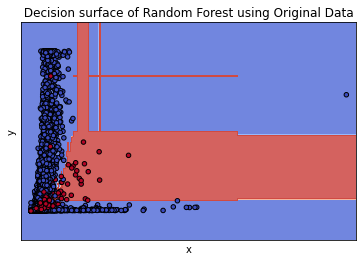

In [35]:
#### Plot of prediction contours using original data

fig, ax = plt.subplots()
title = (' Decision surface of Random Forest using Original Data ')
#### Set-up grid for plotting
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

#### Use the plot_contour function to pass the result of the subplot, the prediction from the classifier, and the
#### meshgrid results (xx, yy) for plotting the prediction contours or the decision surface of the SVM classifier:

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

Note

From this figure, we can see that only a few of the
malignant cases are picked up by the classifier and many
of the malignant cases are misclassified as Benign.

Let's now perform undersampling. Call the
RandomUnderSampler function and store it in the rus
variable, as shown:

In [36]:
rus = RandomUnderSampler(random_state=0)

Use the fit_resample method of
RandomUnderSampler to resample our data and target
variable and store the results in X_resampled and
y_resampled, respectively:

In [37]:
X_resampled, y_resampled = rus.fit_resample(mammography['data'], mammography['target'])

Once we have performed under sampling, check the class
distribution using the counter function on
y_resampled and print the results:

In [38]:
print(sorted(Counter(y_resampled).items()))

[(-1, 260), (1, 260)]


Your output will now show 260 benign cases and 260
malignant cases, implying that the target variable has
been undersampled.

Fit the random forest classifier on the undersampled data,
X_resampled[: [0,1]] and y_resampled. Use the
make_meshgrid function to generate the meshgrid,

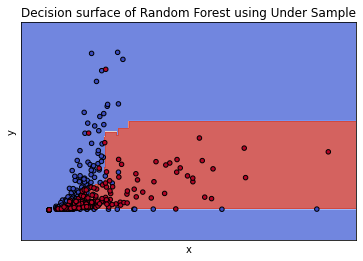

In [39]:
#### Plot of prediction contours using undersampling

X = X_resampled[:, [0, 1]]
y = y_resampled
clf = clf_random.fit(X, y)
fig, ax = plt.subplots()
title = ('Decision surface of Random Forest using Under Sample')
#### Set-up grid for plotting
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
#### plot the prediction contours using the plot_contours function
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

From the preceding figure, we can see that many of the
malignant cases are picked up by the classifier. However,
we also have many less benign cases (260), which was
originally 10,293. Due to the undersampling, our overall
dataset has reduced.

Let's now perform oversampling. Call the
RandomOverSampler function and store it in the ros
variable

In [40]:
ros = RandomOverSampler(random_state=0)

Use the fit_resample method of
RandomOverSampler to resample our data and target
variable and store the results in X_resampled and
y_resampled

In [41]:
X_resampled, y_resampled = ros.fit_resample(mammography['data'],mammography['target'])

Once we have performed oversampling, check the class
distribution using the counter function on
y_resampled:

In [42]:
print(sorted(Counter(y_resampled).items()))

[(-1, 10923), (1, 10923)]


Your output will now show 10,923 benign and malignant
cases, implying that the target variable has been
oversampled.

Fit the SVM classifier on the oversampled data,
X_resampled[:[0,1]] and y_resampled. Use
make_meshgrid to generate the meshgrid

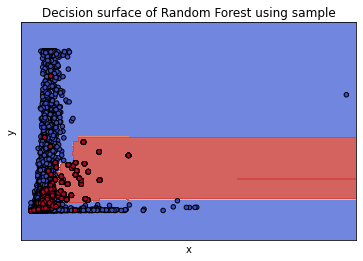

In [43]:
#### Plot pf prediction contours using oversampling

X = X_resampled[:, [0, 1]]
y = y_resampled
clf = clf_random.fit(X, y)
fig, ax = plt.subplots()
title = ('Decision surface of Random Forest using sample')
#### Set-up grid for plotting
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
#### Plot the prediction contours using the plot_contours function:
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

From the preceding figure, you will observe that many of
the malignant cases are picked up by the classifier.
However, we have oversampled our malignant cases by
replicating data points, which increased from 260 to
10,923, and this may lead to an overfitted model.

Finally, let's perform SMOTE. Use the fit_resample
method of the SMOTE() function to resample the data and
store it in a variable, x_resampled and y_resampled

In [44]:
X_resampled, y_resampled = SMOTE().fit_resample(mammography['data'], mammography['target'])

Once we have performed SMOTE, check the class
distribution using the counter function on y_resampled:

In [45]:
print(sorted(Counter(y_resampled).items()))

[(-1, 10923), (1, 10923)]


Fit the random forest classifier on the data, X_resampled[:[0,1]] and y_resampled. Use the make_meshgrid function to generate the meshgrid

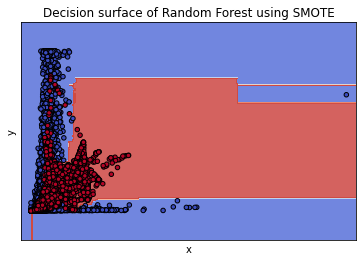

In [46]:
#### Plot of prediction contours using SMOTE

X = X_resampled[:, [0, 1]]
y = y_resampled
clf = clf_random.fit(X, y)
fig, ax = plt.subplots()
title = ('Decision surface of Random Forest using SMOTE')
#### Set-up grid for plotting
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
#### Plot the prediction contours using the plot_contours function
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

From the preceding figure, we can see that some of the
malignant cases are not picked up by the classifier. Although
by using SMOTE, our malignant cases increased from 260 to
10,923, unlike random oversampling, SMOTE doesn't simply
duplicate the data; it generates a similar replica of the
minority class and hence helps in generalizing the model.

#### Fitting a random forest classifier using SMOTE and building the confusion matrix

In preivous exercise, we noticed that our model was not able to generalize because of imbalanced data and our recall score was less than 50%. Out of 52 malignant cases, the model was able to pick only 25 cases correctly. In this exercise, we will build a model using SMOTE that will be able to correctly detect all the malignant cases and improve the recall score.

Note

Use the same Jupyter Notebook as the one used for the preceding two exercises.

In [47]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [48]:
clf_random.fit(X_resampled, y_resampled)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [49]:
y_pred = clf_random.predict(X_test)

In [50]:
#### Output of the classification_report function

target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99      2185
   Malignant       0.58      0.71      0.64        52

    accuracy                           0.98      2237
   macro avg       0.79      0.85      0.81      2237
weighted avg       0.98      0.98      0.98      2237



Text(0.5, 1.0, 'Random Forest \n Accuracy: 0.981')

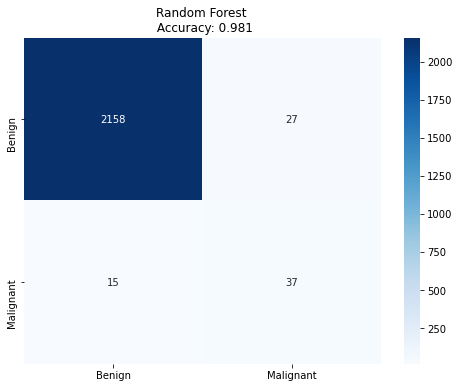

In [51]:
#### Confusion matrix
1
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = ['Benign', 'Malignant'], 
                     columns=['Benign', 'Malignant'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Random Forest \n Accuracy: {0:.3f}'.format(accuracy_score(y_test, y_pred)))

We implemented different techniques to deal with imbalanced datasets. However, it must be noted that there is no single method that can effectively deal with all imbalanced datasets. Each of these methods must be tried to find out the best possible method for a dataset.

We saw that, without using class imbalance, our classifier was able to identify only 25 malignant cases, whereas using sampling techniques (SMOTE), the classifier identified 38 malignant cases. From the classification report, we can see that our recall score went up to 71% from 48%.